In [22]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

### Load Data

In [23]:
# Set directory
os.chdir('/Users/Vageli/Desktop/DABN14/Project/Project_2')

# Load data 
breast = pd.read_csv("./breast_cancer.csv")
display(breast)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Data Preprocessing

In [24]:
# Drop redundant columns
breast = breast.drop(columns=['id','Unnamed: 32'])

# Re-label the classes
breast['diagnosis'] = breast['diagnosis'].map({'M': 1, 'B': 0})

In [25]:
# Verify the dataset
display(breast.info())

# Create response and predictor data
y = breast['diagnosis']
X = breast.drop(columns=['diagnosis'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train data shape', X_train.shape)
print('Test data shape', X_test.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

None

Train data shape (455, 30)
Test data shape (114, 30)


### Logistic Regression

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create a pipeline that normalizes data and applies logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])



In [27]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_log = pipeline.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_log))
print("Accuracy Score:", accuracy_score(y_test, y_pred_log))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy Score: 0.9736842105263158


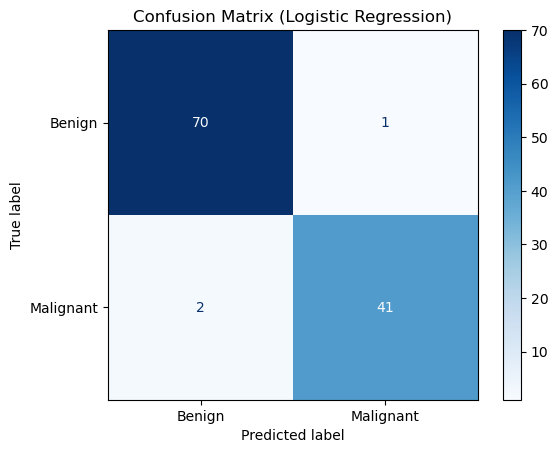

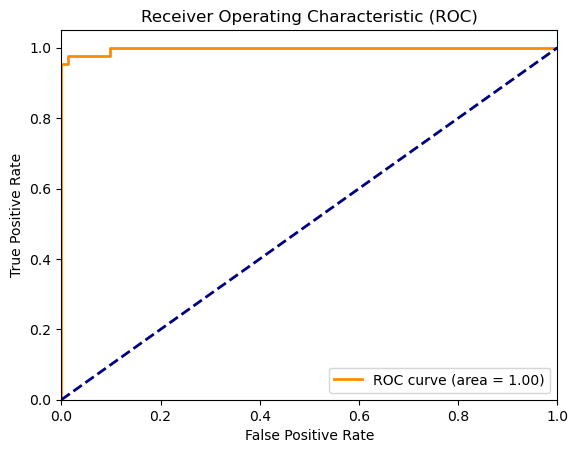

In [28]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_log)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

# Compute the ROC curve and AUC
y_score = pipeline.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()


### Support Vector Machines

In [29]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Create a pipeline with normalization and SVM
pipeline_svm_rbf = Pipeline([
    ('scaler', StandardScaler()),   # Step 1: Normalize the data
    ('svm', SVC(kernel='rbf', C=1, gamma='scale'))  # Step 2: Fit a Support Vector Machine
])

# Fit the pipeline to the training data
pipeline_svm_rbf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm_rbf = pipeline_svm_rbf.predict(X_test)

# Evaluate the model
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm_rbf))
print("Accuracy Score (SVM):", accuracy_score(y_test, y_pred_svm_rbf))

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy Score (SVM): 0.9824561403508771


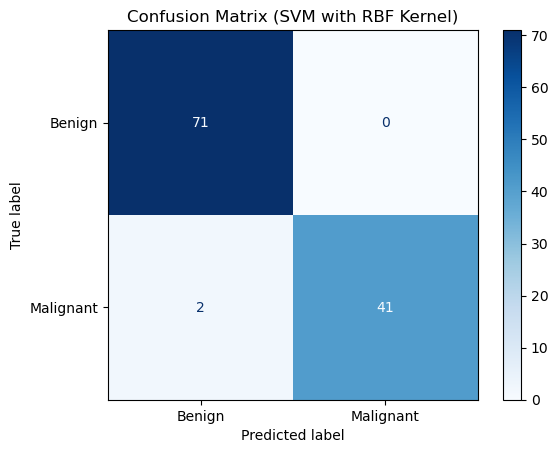

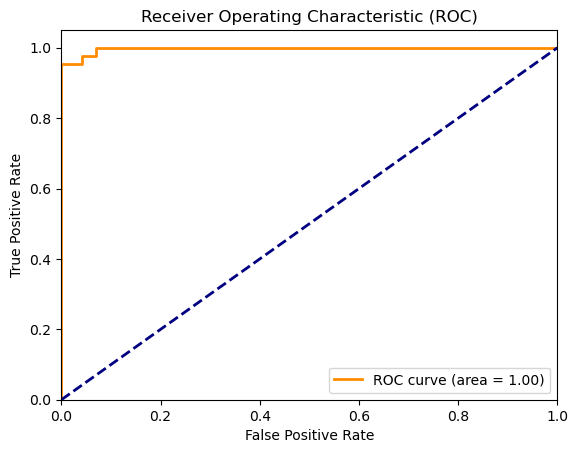

In [30]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_svm_rbf)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (SVM with RBF Kernel)")
plt.show()

# Compute the ROC curve and AUC
y_score = pipeline_svm_rbf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()


### Principal Component Analysis

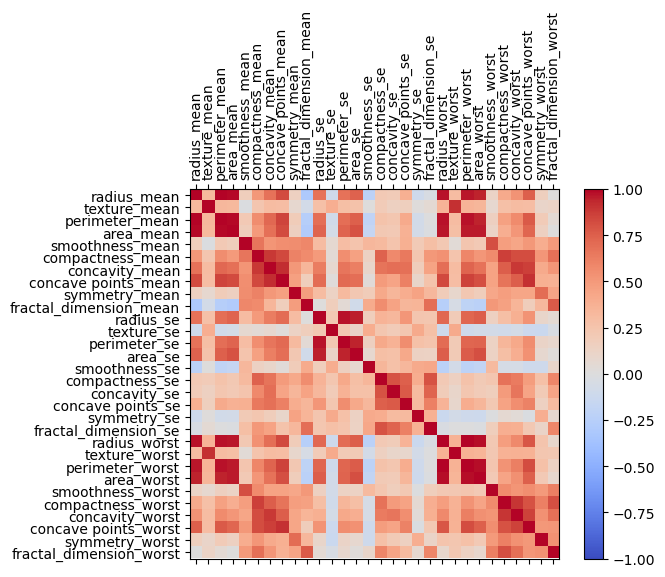

In [31]:
# Plot the correlation matrix
from seaborn import heatmap
data_numeric = breast.drop(columns=['diagnosis'])

corr = data_numeric.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_numeric.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_numeric.columns)
ax.set_yticklabels(data_numeric.columns)
plt.show()

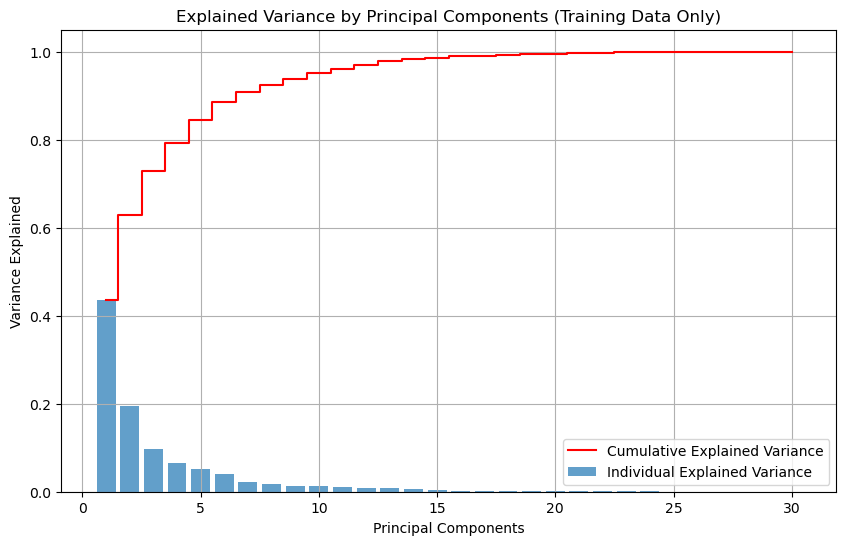


Number of principal components chosen to retain 95.0% variance: 10

Logistic Regression with PCA:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy Score (Logistic Regression): 0.9824561403508771

SVM with PCA:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy Score (SVM): 0.9824561403508771


In [32]:
# PCA
from sklearn.decomposition import PCA

# Create a pipeline for PCA
pipeline_pca_train = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

# Fit the pipeline to the training data
pipeline_pca_train.fit(X_train)

# Access the PCA object from the pipeline
pca_train = pipeline_pca_train.named_steps['pca']

# Calculate explained variance using training data only
explained_variance_ratio = pca_train.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative Explained Variance', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Principal Components (Training Data Only)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Select number of components based on training data
threshold = 0.95
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
print(f"\nNumber of principal components chosen to retain {threshold*100}% variance: {n_components}")

# Create pipelines for Logistic Regression and SVM using chosen components
pipeline_log_reg_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('log_reg', LogisticRegression())
])

pipeline_svm_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('svm', SVC(kernel='linear',class_weight='balanced'))
])

# Fit these pipelines to the training data
pipeline_log_reg_pca.fit(X_train, y_train)
pipeline_svm_pca.fit(X_train, y_train)

# Predictions for evaluation
y_pred_log_pca = pipeline_log_reg_pca.predict(X_test)
y_pred_svm_pca = pipeline_svm_pca.predict(X_test)

# Evaluate Logistic Regression
print("\nLogistic Regression with PCA:")
print(classification_report(y_test, y_pred_log_pca))
print("Accuracy Score (Logistic Regression):", accuracy_score(y_test, y_pred_log_pca))

# Evaluate SVM
print("\nSVM with PCA:")
print(classification_report(y_test, y_pred_svm_pca))
print("Accuracy Score (SVM):", accuracy_score(y_test, y_pred_svm_pca))


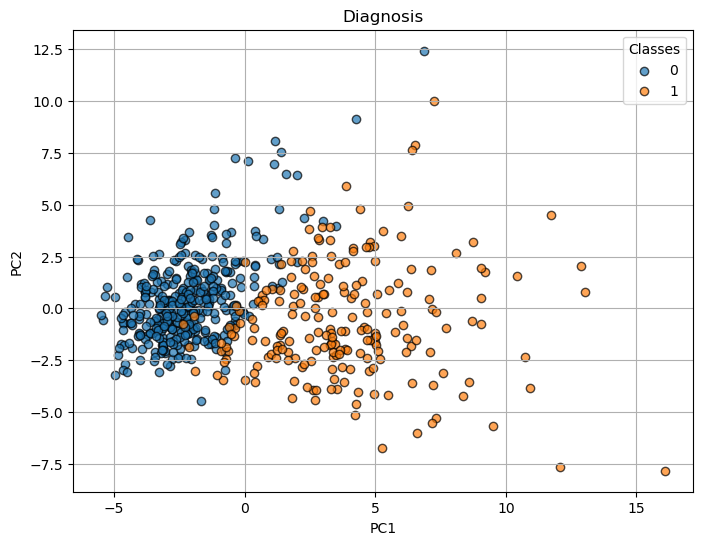

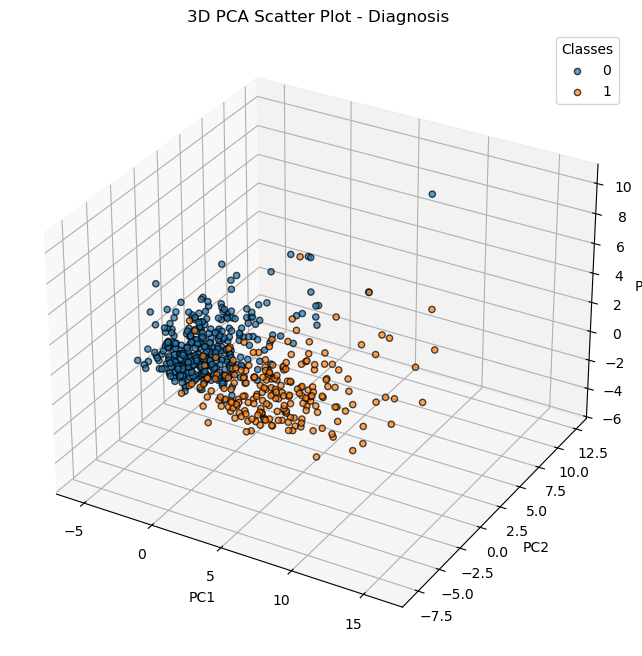

In [33]:
# PCA plot

# Transform the data using the trained PCA pipeline
X_train_pca = pipeline_pca_train.transform(X_train)
X_test_pca = pipeline_pca_train.transform(X_test)

# Combine PCA-transformed training and testing data for visualization
X_pca_combined = np.vstack((X_train_pca, X_test_pca))
y_combined = np.hstack((y_train, y_test))


# First two pricnipal components
plt.figure(figsize=(8, 6))
for label, color in zip(np.unique(y_combined), ['black', 'green']):
    plt.scatter(
        X_pca_combined[y_combined == label, 0],  # PC1
        X_pca_combined[y_combined == label, 1],  # PC2
        label=f'{label}',
        alpha=0.7,
        edgecolors='k'
    )

# Customize plot appearance
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Diagnosis')
plt.legend(loc='best', title='Classes')
plt.grid(True)
plt.show()

# First three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')  # 3D projection

for label, color in zip(np.unique(y_combined), ['black', 'green']):
    ax.scatter(
        X_pca_combined[y_combined == label, 0],  # PC1
        X_pca_combined[y_combined == label, 1],  # PC2
        X_pca_combined[y_combined == label, 2],  # PC3
        label=f'{label}',
        alpha=0.7,
        edgecolors='k'
    )

# Customize the appearance of the plot
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Scatter Plot - Diagnosis')
ax.legend(loc='best', title='Classes')
plt.show()

### Auto-Encoder

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.optimizers import Adam


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Autoencoder
input_dim = X_train_scaled.shape[1]
encoding_dim = 10 # Dimensionality of the compressed representation

# Define encoder and decoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Encoder model (for compression)
encoder = Model(inputs=input_layer, outputs=encoded)

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


# Train the Autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_split=0.2,
                verbose=0)

# Transform the data using the encoder
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

# Train Logistic Regression and SVM on the compressed data
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_encoded, y_train)
y_pred_log = log_reg.predict(X_test_encoded)

# SVM
svm = SVC(kernel='rbf', gamma='scale',class_weight='balanced')
svm.fit(X_train_encoded, y_train)
y_pred_svm = svm.predict(X_test_encoded)

# Evaluate the models
print("\nLogistic Regression with Autoencoder:")
print(classification_report(y_test, y_pred_log))
print("Accuracy Score (Logistic Regression):", accuracy_score(y_test, y_pred_log))

print("\nSVM with Autoencoder:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy Score (SVM):", accuracy_score(y_test, y_pred_svm))


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step

Logistic Regression with Autoencoder:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy Score (Logistic Regression): 0.9736842105263158

SVM with Autoencoder:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy Score (SVM): 0.9736842105263158
